## **DHASH AND HAMMING DISTANCE**


### Install necessary libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2
import os
import itertools
from hashlib import md5
from scipy.spatial.distance import hamming

### Mount Google Drive to access files

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set image directory

In [ ]:
IMAGE_DIR = '/duplicate_images'

### List all image files

In [9]:
os.chdir(IMAGE_DIR)
image_files = [f for f in os.listdir() if os.path.isfile(f)]
print(f"Total Images: {len(image_files)}")

Total Images: 32


### Helper Functions

In [10]:
def filter_images(images):
    image_list = []
    for image in images:
        try:
            assert imageio.imread(image).shape[2] == 3
            image_list.append(image)
        except AssertionError as e:
            print(f"Skipping {image}: {e}")
    return image_list

def img_gray(image):
    image = imageio.imread(image)
    return np.average(image, weights=[0.299, 0.587, 0.114], axis=2)

def resize(image, height=30, width=30):
    row_res = cv2.resize(image, (height, width), interpolation=cv2.INTER_AREA).flatten()
    col_res = cv2.resize(image, (height, width), interpolation=cv2.INTER_AREA).flatten('F')
    return row_res, col_res

def intensity_diff(row_res, col_res):
    difference_row = np.diff(row_res) > 0
    difference_col = np.diff(col_res) > 0
    return np.vstack((difference_row, difference_col)).flatten()

def difference_score(image, height=30, width=30):
    gray = img_gray(image)
    row_res, col_res = resize(gray, height, width)
    return intensity_diff(row_res, col_res)

def hamming_distance(image, image2):
    return hamming(image, image2)

### Main Processing Functions

In [11]:
def difference_score_dict_hash(image_list):
    ds_dict = {}
    duplicates = []
    for image in image_list:
        ds = difference_score(image)
        filehash = md5(ds).hexdigest()
        if filehash not in ds_dict:
            ds_dict[filehash] = image
        else:
            duplicates.append((image, ds_dict[filehash]))
    return duplicates, ds_dict

def difference_score_dict(image_list):
    ds_dict = {}
    duplicates = []
    for image in image_list:
        ds = difference_score(image)
        ds_dict[image] = ds
    return ds_dict

### Filter images

In [12]:
image_files = filter_images(image_files)

<ipython-input-10-fc85b105ff68>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  assert imageio.imread(image).shape[2] == 3


### Compute duplicates

In [13]:
ds_dict = difference_score_dict(image_files)
duplicates = []

<ipython-input-10-fc85b105ff68>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image)


### Compare pairs for duplicates


In [14]:
for k1, k2 in itertools.combinations(ds_dict.keys(), 2):
    if hamming_distance(ds_dict[k1], ds_dict[k2]) < 0.10:
        duplicates.append((k1, k2))

print(f"Found {len(duplicates)} duplicates")

Found 10 duplicates


### Display duplicates


<ipython-input-16-142f167d8ff2>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.subplot(121), plt.imshow(imageio.imread(file_names[0]))
<ipython-input-16-142f167d8ff2>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.subplot(122), plt.imshow(imageio.imread(file_names[1]))


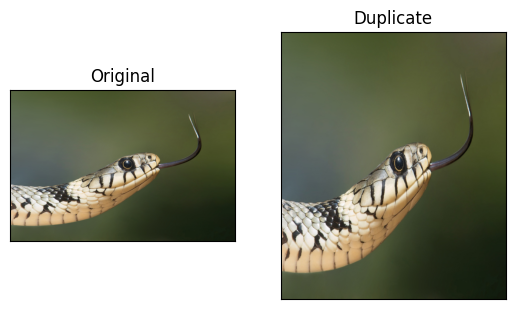

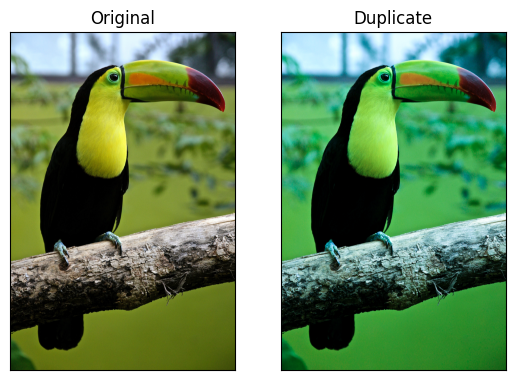

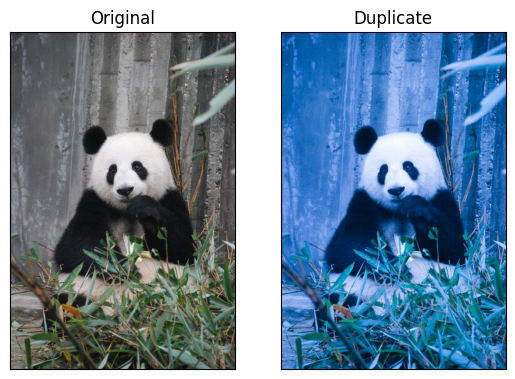

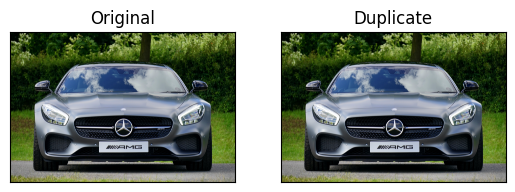

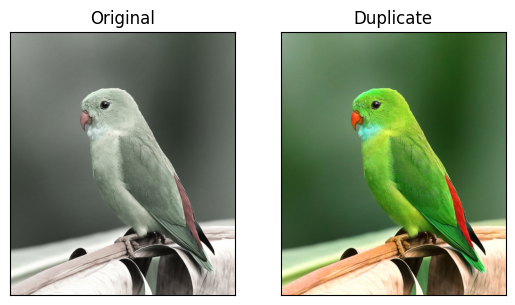

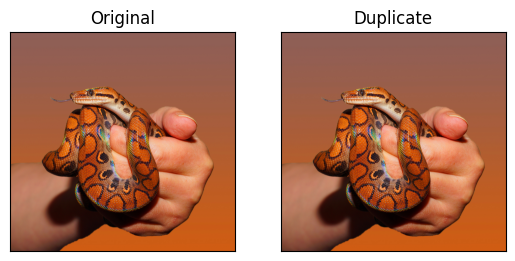

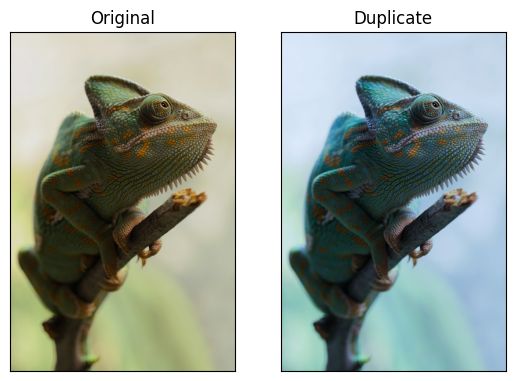

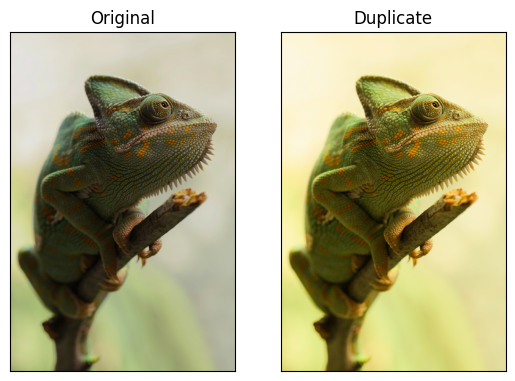

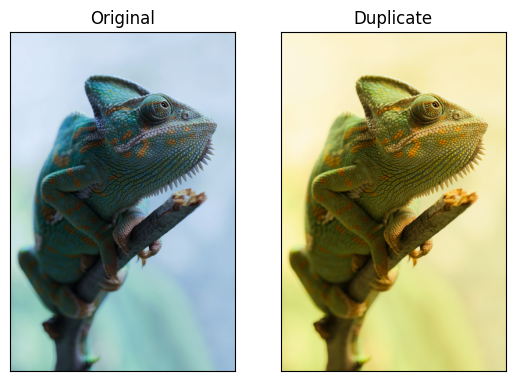

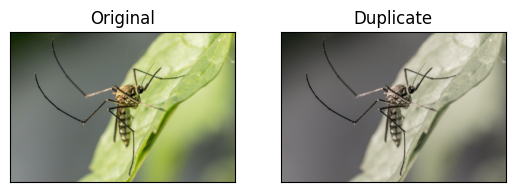

In [16]:
for file_names in duplicates[:10]:  # Limit to 10 for display
    try:
        plt.subplot(121), plt.imshow(imageio.imread(file_names[0]))
        plt.title('Original'), plt.xticks([]), plt.yticks([])

        plt.subplot(122), plt.imshow(imageio.imread(file_names[1]))
        plt.title('Duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    except Exception as e:
        print(f"Error displaying images: {e}")

### Delete duplicate files

In [17]:
for file_names in duplicates:
    try:
        # file_names[1] is the duplicate file, file_names[0] is the original
        os.remove(file_names[1])  # Deletes the duplicate file
        print(f"Deleted: {file_names[1]}")
    except Exception as e:
        print(f"Error deleting {file_names[1]}: {e}")

Deleted: pexels-pixabay-80474.jpg
Deleted: pexels-carlos-pitzer-178111.jpg
Deleted: pexels-laura-the-explaura-36082632.jpg
Deleted: pexels-zzie-112467404.jpg
Deleted: pexels-roshan-kamath-1661179.jpg
Deleted: pexels-pixabay-34427.jpg
Deleted: pexels-pixabay-6228934.jpg
Deleted: pexels-pixabay-edit622895.jpg
Error deleting pexels-pixabay-edit622895.jpg: [Errno 2] No such file or directory: 'pexels-pixabay-edit622895.jpg'
Deleted: pexels-tsatheesh-zholakkal-4396985.jpg
